In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from matplotlib import font_manager

In [49]:
df = pd.read_csv("/kaggle/input/cleaned-coffee-analysis/coffee_analysis_clean.csv")

Within this notebook, my approach to analyse this dataset will be proceeding question by question.

In [50]:
#Let's get to know our dataset
df.head()

,name,roaster,roast,loc_country,origin_1,origin_2,100g_USD,rating,review_date,desc_1,desc_2,desc_3
0,Kenya Nyeri Gichathaini AA Top,Lu's Coffee,Medium-Light,Taiwan,Nyeri Growing Region,South-Central Kenya,5.12,93,October 2023,"Richly sweet-savory. Red currant, narcissus, t...",Produced by smallholding members of the Gikand...,"A deep-toned, sweetly savory Kenya cup with in..."
1,Wilton Benitez Java,JBC Coffee Roasters,Medium-Light,United States,Piendamó,Cauca,11.02,96,October 2023,"Multi-layered, enigmatic. Tart citrus, myrrh, ...",Produced by Wilton Benitez entirely of the Eth...,"An impossibly complex, delightfully floral car..."
2,HWC Holy Melody Espresso Blend,HWC Coffee Roasters,Medium-Light,Taiwan,Kenya,Ethiopia,17.64,94,September 2023,"Evaluated as espresso. Deeply sweet-savory, fr...","A blend of coffees from Kenya and Ethiopia, ro...","A complex, multi-layered espresso blend with n..."
3,HWC Power Drum Espresso Blend,HWC Coffee Roasters,Medium-Light,Taiwan,Peru,Guatemala,17.64,93,September 2023,"Evaluated as espresso. Richly chocolaty, sweet...","A blend of coffees from Peru and Guatemala, ro...","A bold, chocolaty espresso blend supported by ..."
4,El Salvador Monte Verde,Speedwell Coffee,Medium-Light,United States,Monte Verde,Santa Ana Department,4.70,92,September 2023,"Sweetly bright, rich-toned. Baking chocolate, ...",Produced by Rene Contreras on the family farm ...,A solid El Salvador cup with a crisp chocolate...


We have 12 columns in total
name: name of the blends
roaster: roasting company
roast: roast degree
col_country: country that the beans are roasted
origin_1, origin_2: origins of the beans
100g_USD: price of beans ($) per 100 g
rating: rating of beans between 0-100
desc_1, desc_2, desc_3: reviews of the beans

In [51]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2301 entries, 0 to 2300
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         2301 non-null   object 
 1   roaster      2301 non-null   object 
 2   roast        2278 non-null   object 
 3   loc_country  2301 non-null   object 
 4   origin_1     2301 non-null   object 
 5   origin_2     2301 non-null   object 
 6   100g_USD     2301 non-null   float64
 7   rating       2301 non-null   int64  
 8   review_date  2301 non-null   object 
 9   desc_1       2300 non-null   object 
 10  desc_2       2301 non-null   object 
 11  desc_3       2300 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 215.8+ KB
None


In [52]:
print(df.describe())

          100g_USD       rating
count  2301.000000  2301.000000
mean     14.209813    93.089526
std     198.762682     1.621534
min       0.170000    82.000000
25%       4.980000    92.000000
50%       5.950000    93.000000
75%       8.820000    94.000000
max    9487.500000    98.000000


In [53]:
#Checking for missing values
print(df.isnull().sum())

name            0
roaster         0
roast          23
loc_country     0
origin_1        0
origin_2        0
100g_USD        0
rating          0
review_date     0
desc_1          1
desc_2          0
desc_3          1
dtype: int64


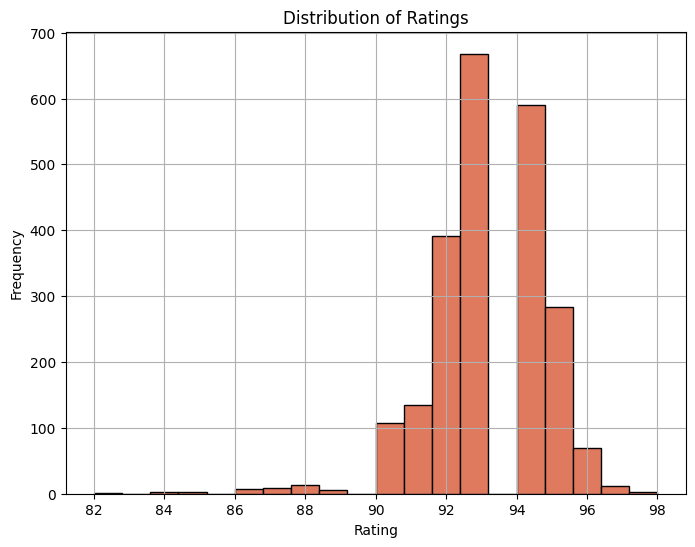

In [54]:
#Visualizing rating

plt.figure(figsize=(8,6))
df['rating'].hist(bins=20, edgecolor='black', color=['#e07a5f'])
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

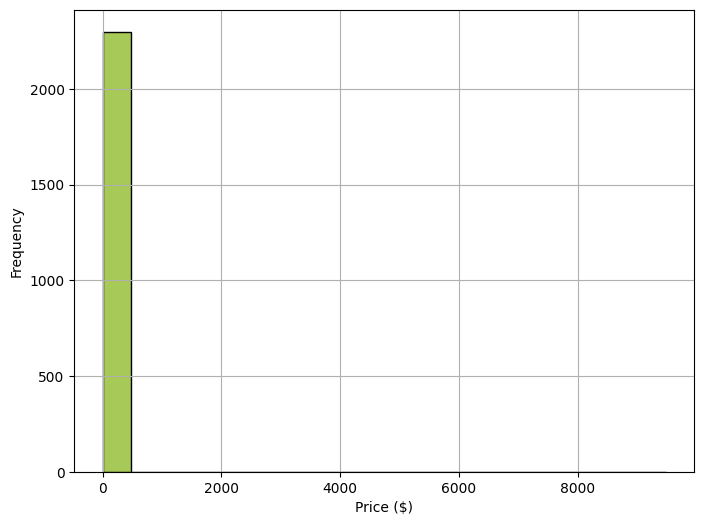

In [55]:
#Visualizing Prices of Coffee Beans per 100 g ($)
plt.figure(figsize=(8,6))
df['100g_USD'].hist(bins=20, edgecolor = 'black', color=['#a7c957'])
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

In [56]:
#Visualizing the relationship between roast and rating
#First let's define our roasting types
roasting_types = df['roast'].unique()
print(roasting_types)


['Medium-Light' 'Light' 'Medium' 'Medium-Dark' 'Dark' nan]


<Figure size 1000x600 with 0 Axes>

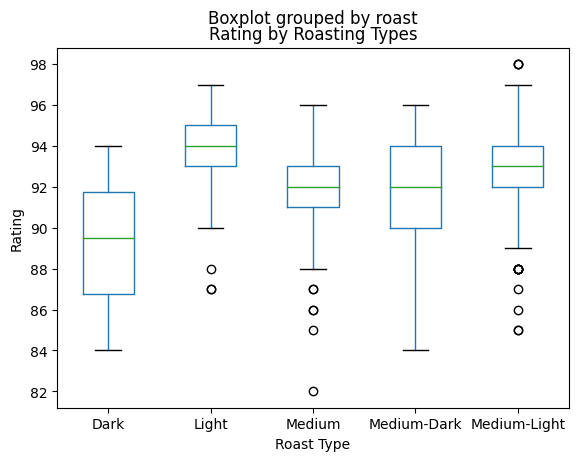

In [57]:
plt.figure(figsize=(10,6))
df.boxplot(column='rating', by='roast', grid=False)
plt.title('Rating by Roasting Types')
plt.xlabel('Roast Type')
plt.ylabel('Rating')
plt.show()

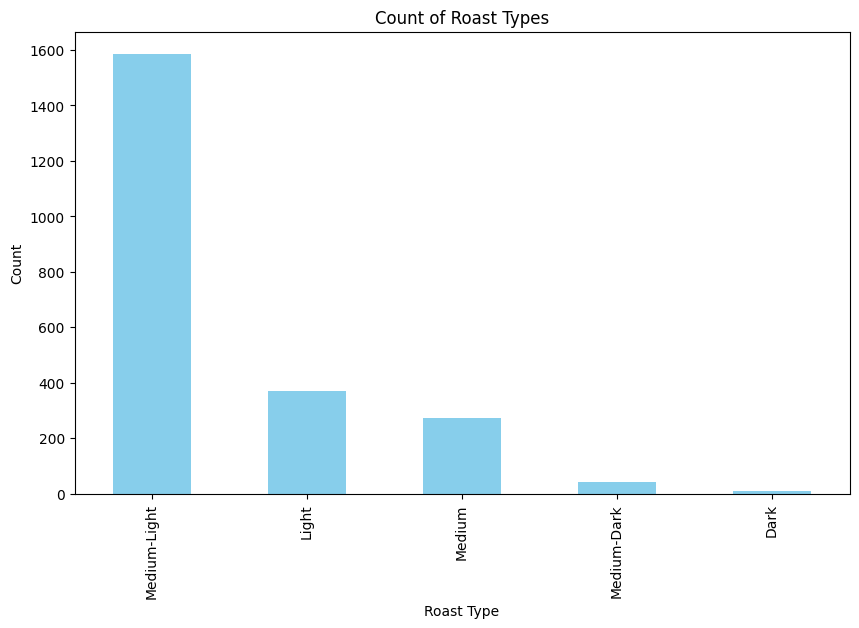

In [58]:
# Count plot of 'roast' types
plt.figure(figsize=(10, 6))
df['roast'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Count of Roast Types')
plt.xlabel('Roast Type')
plt.ylabel('Count')
plt.show()

In [59]:
#Are there any missing values in important columns such as name, roaster, roast, origin_1, origin_2, 100g_USD, rating, review_date, desc_1, desc_2, and desc_3?
df.isnull().sum()


name            0
roaster         0
roast          23
loc_country     0
origin_1        0
origin_2        0
100g_USD        0
rating          0
review_date     0
desc_1          1
desc_2          0
desc_3          1
dtype: int64

In [60]:
#Drop rows with missing values
df = df.dropna(subset=['roast','desc_1','desc_3'])

# Print the count of missing values after dropping
print(df.isnull().sum())

name           0
roaster        0
roast          0
loc_country    0
origin_1       0
origin_2       0
100g_USD       0
rating         0
review_date    0
desc_1         0
desc_2         0
desc_3         0
dtype: int64


In [61]:
#Are there any duplicate records in the dataset? If so, how should they be handled?
df.duplicated().sum()

0

In [62]:
df.head()

,name,roaster,roast,loc_country,origin_1,origin_2,100g_USD,rating,review_date,desc_1,desc_2,desc_3
0,Kenya Nyeri Gichathaini AA Top,Lu's Coffee,Medium-Light,Taiwan,Nyeri Growing Region,South-Central Kenya,5.12,93,October 2023,"Richly sweet-savory. Red currant, narcissus, t...",Produced by smallholding members of the Gikand...,"A deep-toned, sweetly savory Kenya cup with in..."
1,Wilton Benitez Java,JBC Coffee Roasters,Medium-Light,United States,Piendamó,Cauca,11.02,96,October 2023,"Multi-layered, enigmatic. Tart citrus, myrrh, ...",Produced by Wilton Benitez entirely of the Eth...,"An impossibly complex, delightfully floral car..."
2,HWC Holy Melody Espresso Blend,HWC Coffee Roasters,Medium-Light,Taiwan,Kenya,Ethiopia,17.64,94,September 2023,"Evaluated as espresso. Deeply sweet-savory, fr...","A blend of coffees from Kenya and Ethiopia, ro...","A complex, multi-layered espresso blend with n..."
3,HWC Power Drum Espresso Blend,HWC Coffee Roasters,Medium-Light,Taiwan,Peru,Guatemala,17.64,93,September 2023,"Evaluated as espresso. Richly chocolaty, sweet...","A blend of coffees from Peru and Guatemala, ro...","A bold, chocolaty espresso blend supported by ..."
4,El Salvador Monte Verde,Speedwell Coffee,Medium-Light,United States,Monte Verde,Santa Ana Department,4.70,92,September 2023,"Sweetly bright, rich-toned. Baking chocolate, ...",Produced by Rene Contreras on the family farm ...,A solid El Salvador cup with a crisp chocolate...


/tmp/ipykernel_42/3976660886.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['review_date'] = pd.to_datetime(df['review_date'])


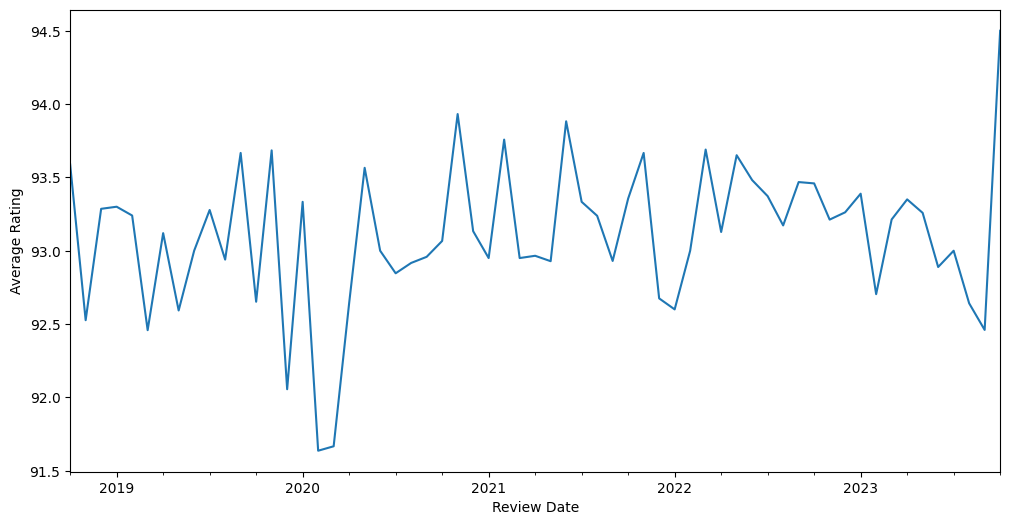

In [63]:
#Explore the distribution of ratings over time using a line plot
df['review_date'] = pd.to_datetime(df['review_date'])
# Plotting without setting 'review_date' as index
df.groupby(df['review_date'].dt.to_period("M"))['rating'].mean().plot(figsize=(12, 6))
plt.xlabel('Review Date')
plt.ylabel('Average Rating')
plt.show()

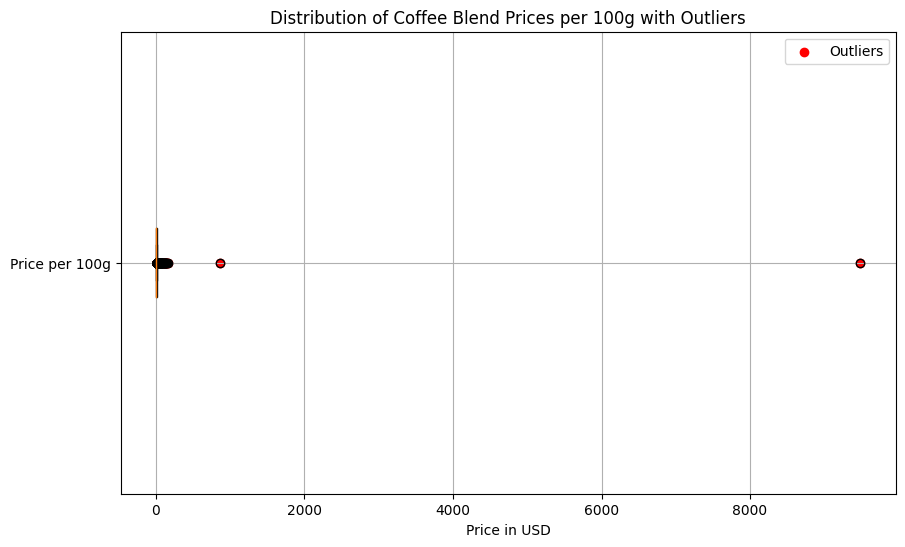

In [64]:
#Do any columns contain outliers that need to be addressed, especially in numeric columns like 100g_USD and rating?
price_data = df['100g_USD']
Q1 = price_data.quantile(0.25)
Q3 = price_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = price_data[(price_data < lower_bound) | (price_data>upper_bound)]
plt.figure(figsize=(10, 6))
plt.boxplot(price_data, vert=False, patch_artist=True, labels=['Price per 100g'])
plt.scatter(outliers, [1] * len(outliers), color='red', label='Outliers')
plt.title('Distribution of Coffee Blend Prices per 100g with Outliers')
plt.xlabel('Price in USD')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()    

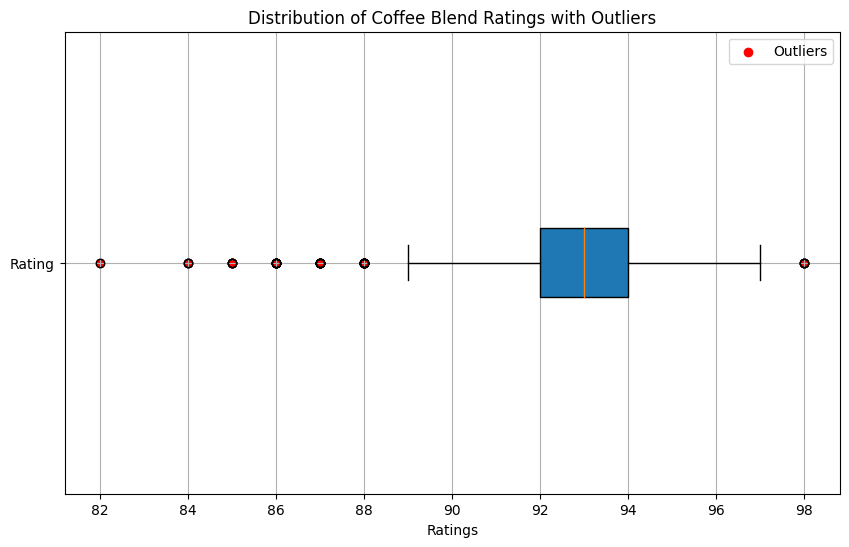

In [43]:
#rating
rating_data = df['rating']
Q1 = rating_data.quantile(0.25)
Q3 = rating_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = rating_data[(rating_data < lower_bound) | (rating_data > upper_bound)]
plt.figure(figsize=(10, 6))
plt.boxplot(rating_data, vert=False, patch_artist=True, labels=['Rating'])
plt.scatter(outliers, [1] * len(outliers), color='red', label='Outliers')
plt.title('Distribution of Coffee Blend Ratings with Outliers')
plt.xlabel('Ratings')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [65]:
#DATA ANALYSIS
#Which roasters have the highest average rating for their blends?

avg_rating = df.groupby(['roaster', 'roast'])['rating'].mean()

best_roaster = avg_rating.idxmax()
highest_avg_rating = avg_rating.max()

best_roaster, best_roast_type = best_roaster
print(f"The roaster with the highest average blend rating is {best_roaster} with a roast type of {best_roast_type} and an average rating of {highest_avg_rating:.2f}.")

The roaster with the highest average blend rating is Bird Rock Coffee Roasters with a roast type of Medium and an average rating of 96.00.


In [66]:
#What is the distribution of roast types (Light, Medium-Light, Medium, Medium-Dark, Dark) in the dataset?
roast_dist = df['roast'].value_counts()
print(roast_dist)


roast
Medium-Light    1587
Light            367
Medium           273
Medium-Dark       41
Dark               8
Name: count, dtype: int64


In [67]:
#Which countries have the highest number of roasters? Are there any patterns or trends in the coffee blends based on the roaster's location?
top_countries = df['loc_country'].value_counts()
print(top_countries)

roaster_trends = df.groupby(['loc_country' , 'roaster'])['name'].count()
print(roaster_trends)

loc_country
United States              1409
Taiwan                      645
Hawaii                       91
Guatemala                    46
China                        28
Canada                       20
Japan                        12
Colombia                      5
Big Island Of Hawaii          4
Mexico                        3
England                       3
Chia-Yi                       2
Belgium                       1
United States And Floyd       1
Honduras                      1
New Taiwan                    1
Kenya                         1
Calfornia                     1
Utah                          1
Uganda                        1
Name: count, dtype: int64
loc_country              roaster                         
Belgium                  Vascobelo                            1
Big Island Of Hawaii     Paradise Roasters                    4
Calfornia                Mostra Coffee                        1
Canada                   421 Brew House                       2
        

In [69]:
#How does the price per 100g vary across different roast types and origins?
df['origin'] = df['origin_1'] + '-' + df['origin_2']
price_var = df.groupby(['roast','origin'])['100g_USD'].mean()
print(price_var)

roast         origin                                       
Dark          Africa/Arabia-Indo-Pacific                        4.400000
              Gayo (Also Aceh) Growing Region-Aceh Province     8.500000
              Karo Regency-North Sumatra                        4.630000
              Latin America-Americas                            2.930000
              Nyeri Growing Region-South-Central Kenya         11.330000
                                                                 ...    
Medium-Light  Yirgacheffe-Southern Ethiopia                    21.233333
              Yirgachefffe Growing Region-Southern Ethiopia     6.340000
              Yunnan Province-China                             4.410000
              Zambia-Colombia                                   4.560000
              Zambia-Sidamo (Also Sidama) Growing Region        4.390000
Name: 100g_USD, Length: 1158, dtype: float64


In [70]:
#What are the most common origins of coffee beans in the dataset? Are there any notable blends with unique origin combinations?
common_origin = df['origin'].value_counts()
#print(common_origin)

unique_comb = df.groupby(['name'])['origin'].nunique()
notable_blends = unique_comb[unique_comb>1]
print(notable_blends, unique_comb)

name
5a Poniente                    2
5a Sur                         2
Andi Sumatra                   2
Banco Gotete Ethiopia          2
Bella Carmona Guatemala        2
                              ..
Suyusama Colombia              3
Tanzania Peaberry              3
The Natural                    2
Yemen Al Mashtal Al Burhani    2
Yemen Mocha Haimi              2
Name: origin, Length: 92, dtype: int64 name
#She_Builds                             1
100% Guatemalan                         1
100% Kona Bourbon                       1
100% Kona Bourbon Pointu Laurina        1
100% Organic Specialty Arabica          1
                                       ..
Zambia Kateshi Natural                  1
Zambia Kateshi Natural Process          1
Zambia Mafinga Hills Natural            1
‘Ōpio Kona                              1
“Double A Train” Kenya Kabunyeria AA    1
Name: origin, Length: 2071, dtype: int64


In [71]:
#Are there any trends or patterns in the ratings of coffee blends over time? How has the average rating changed over the years?
#As in to recall, we already converted our review_date column to date time, now it is needed to extract year from column
df['review_year'] = df['review_date'].dt.year
avg_rating_trend = df.groupby(['review_year'])['rating'].mean()
print(avg_rating_trend)

review_year
2018    93.000000
2019    92.949324
2020    92.915888
2021    93.200000
2022    93.286225
2023    92.964384
Name: rating, dtype: float64


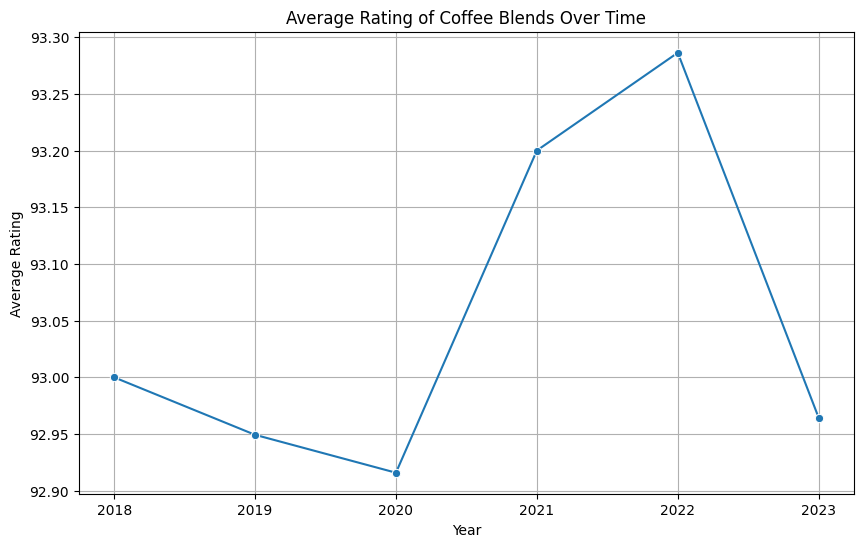

In [72]:
#Visualize the trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_rating_trend.index, y=avg_rating_trend.values, marker='o')
plt.title('Average Rating of Coffee Blends Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

In [73]:
#Is there a correlation between the price per 100g and the rating of the coffee blends? Do more expensive blends tend to receive higher ratings?
correlation = df[['100g_USD', 'rating']]
print(correlation.corr(method='pearson'))


          100g_USD    rating
100g_USD  1.000000  0.028308
rating    0.028308  1.000000


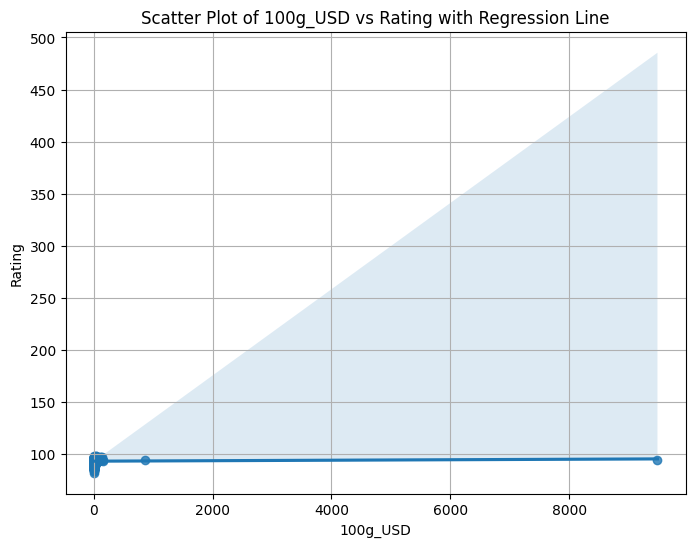

In [74]:
plt.figure(figsize=(8, 6))
sns.regplot(x='100g_USD', y='rating', data=df)
plt.title('Scatter Plot of 100g_USD vs Rating with Regression Line')
plt.xlabel('100g_USD')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

In [75]:
#Indicate the accuracy of regression line
x = df['100g_USD']
y = df['rating']
m, b = np.polyfit(x,y, 1)
y_pred = m * x + b
mse = np.mean((y - y_pred)**2)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

2.636960632228785
1.6238721107983796


In [76]:
#Which blends are the most expensive per 100g, and do they correspond to higher ratings?
expensive_blends = df.nlargest(5, '100g_USD')
print(expensive_blends[['name', '100g_USD', 'rating']])

#correlation 
correlation = df['100g_USD'].corr(df['rating'])
print("\nCorrelation between Price per 100g and Rating:", correlation)

                                                 name  100g_USD  rating
634              Taiwan Natural Alishan Ching-Ye Farm   9487.50      94
1960  Ethiopia Natural Yirgacheffe Blue Donkey Lot #2    862.50      94
1149                                     Andi Sumatra    158.33      93
1151                                  Gigesa Ethiopia    150.00      94
997                                 Mama Cata Mokkita    132.28      97

Correlation between Price per 100g and Rating: 0.028307692317104578


In [77]:
#Are there specific words or phrases in the review descriptions that correlate with higher ratings? Can sentiment analysis be applied to the reviews?
# Convert NaN values to empty strings
df[['desc_1', 'desc_2', 'desc_3']] = df[['desc_1', 'desc_2', 'desc_3']].fillna('')
#Combine reviews into a single column
df['combined_reviews'] = df[['desc_1', 'desc_2', 'desc_3']].apply(lambda x: ' '.join(map(str, x)), axis=1)


In [78]:
def common_words(df, column, value):
    filtered_df = df[df[column].str.contains(value, case=False, na=False)]
    
 
    # Combine reviews into a single text
    text = " ".join(review for review in filtered_df["combined_reviews"]).lower()
    # Set up stopwords
    stopwords = set(STOPWORDS)
    stopwords.update(["drink", "now", "cup", "toned", "note", "finish", "aroma", "notes", "hint", "mouthfeel", "structure", "coffee", "blend", "espresso", "coffees"])
    

    # Generate and display the WordCloud
    wordcloud = WordCloud(stopwords=stopwords, collocations=False, colormap="copper", random_state=11).generate(text)
    
    plt.figure(figsize=(12, 6))
    plt.title(value, size=16)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

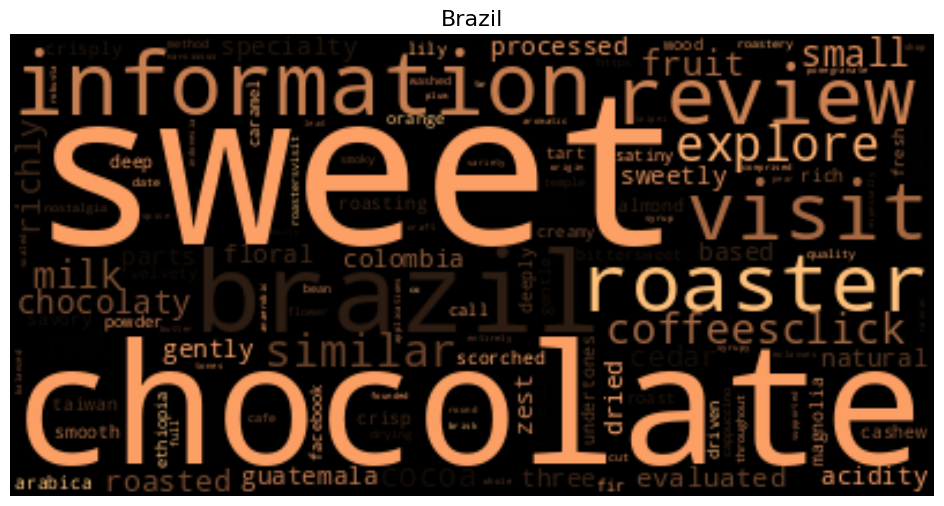

In [79]:
common_words(df, 'origin', 'Brazil')

You can see most common words in reviews whose origin is from Brazil.

In [80]:
#Which blends are the most popular based on the number of reviews or ratings? Are there any trends in the popularity of specific blends over time?
#Most popular brands based on number of reviews:
blend_reviews_count = df.groupby('name')['combined_reviews'].count().sort_values(ascending=False)
top_n_blends_reviews = blend_reviews_count.head(3)

print("Top 3 blends based on the number of reviews:")
print(top_n_blends_reviews)

Top 3 blends based on the number of reviews:
name
Espresso Blend             7
Bella Carmona Guatemala    5
Sumatra Pantan Musara      5
Name: combined_reviews, dtype: int64


In [81]:
#Most popular blends based on rating
rating_reviews_count = df.groupby('name')['rating'].mean().sort_values(ascending=False)
top_n_blend_rating = rating_reviews_count.head(3)

print("Top 3 blends based on ratings:")
print(top_n_blend_rating)

Top 3 blends based on ratings:
name
Finca Sophia Gesha Washed               98.0
Wilton Benitez Pink Bourbon Colombia    98.0
GW01 Finca Sophia Olympus Geisha        98.0
Name: rating, dtype: float64


In [82]:
#Trends in blend popularity over time
# Extract year from the review date
df['review_year'] = df['review_date'].dt.year

# Group by blend and review year, count the number of reviews for each blend and year
blend_yearly_reviews = df.groupby(['name', 'review_year'])['combined_reviews'].count().reset_index()

# Pivot the table to have blends as rows, years as columns, and counts as values
blend_yearly_pivot = blend_yearly_reviews.pivot_table(index='name', columns='review_year', values='combined_reviews', fill_value=0)

# Display the pivot table
print("\nBlend popularity trends over time:")
print(blend_yearly_pivot)


Blend popularity trends over time:
review_year                           2018  2019  2020  2021  2022  2023
name                                                                    
#She_Builds                              0     0     0     1     0     0
100% Guatemalan                          0     0     1     0     0     0
100% Kona Bourbon                        0     1     0     0     0     0
100% Kona Bourbon Pointu Laurina         0     1     1     1     0     0
100% Organic Specialty Arabica           0     0     0     1     0     0
...                                    ...   ...   ...   ...   ...   ...
Zambia Kateshi Natural                   0     1     0     0     0     0
Zambia Kateshi Natural Process           0     1     0     0     0     0
Zambia Mafinga Hills Natural             0     0     0     0     1     0
‘Ōpio Kona                               0     0     0     0     1     0
“Double A Train” Kenya Kabunyeria AA     0     0     1     0     0     0

[2071 rows x 6